<a href="https://colab.research.google.com/github/AnanyaGodse/Image-Processing-and-Computer-Vision-I/blob/main/IPCV_Experiment_4_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 4 - Histogram Equalization**


Histogram equalization is used to enhance the contrast of an image by adjusting the intensity distribution of the pixels. It redistributes the intensity levels of the image such that the histogram of the output image has a more uniform distribution of intensities.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns

In [ ]:
img = cv2.imread('low contrast lake image.png')

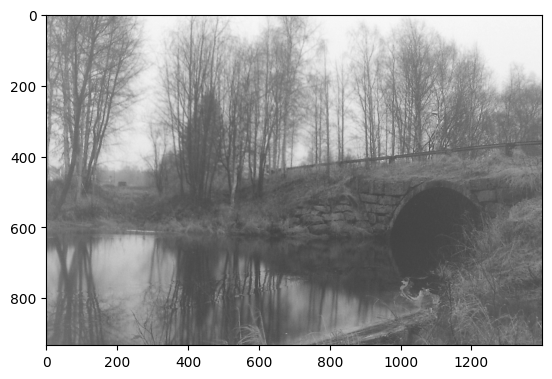

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
def get_pixel_frequency(img):
  pixel_freq = np.zeros(256)
  for row in range(img.shape[0]):
    for col in range(img.shape[0]):
      pixel_val = img[row][col]
      pixel_freq[pixel_val] += 1
  return pixel_freq

In [ ]:
pixel_freq = get_pixel_frequency(img)
pixel_freq

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       2.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
       3.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00, 7.0000e+00,
       1.3000e+01, 2.0000e+01, 1.5000e+01, 2.8000e+01, 4.2000e+01,
       8.1000e+01, 1.4000e+02, 3.2400e+02, 5.9200e+02, 9.2900e+02,
       1.2470e+03, 1.4240e+03, 2.0170e+03, 3.4490e+03, 4.7290e

In [ ]:
pixel_freq_df = pd.DataFrame(pixel_freq)
pixel_freq_df.rename(columns={0: 'frequency'}, inplace=True)

In [ ]:
pixel_freq_df

,frequency
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
251,0.0
252,0.0
253,0.0
254,0.0


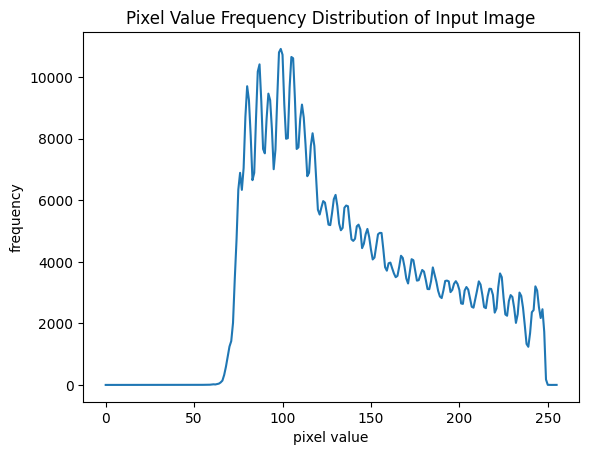

In [ ]:
sns.lineplot(data=pixel_freq_df, x=pixel_freq_df.index, y='frequency').set(xlabel='pixel value', title='Pixel Value Frequency Distribution of Input Image')
plt.show()

In [ ]:
def make_pixel_map(pixel_freq):
  pixel_pdf = pixel_freq/np.sum(pixel_freq)
  pixel_cumsum = np.cumsum(pixel_pdf)
  bits_cumsum = 255 * pixel_cumsum
  pixel_map = np.fix(bits_cumsum).astype(int)
  return pixel_map

In [ ]:
pixel_map = make_pixel_map(pixel_freq)

In [ ]:
def generate_output_img(img, pixel_map):
  output_img = img.copy()
  for row in range(output_img.shape[0]):
    for col in range(output_img.shape[1]):
      pixel_val = img[row][col]
      output_img[row][col] = pixel_map[pixel_val]
  return output_img


In [ ]:
output_img = generate_output_img(img, pixel_map)

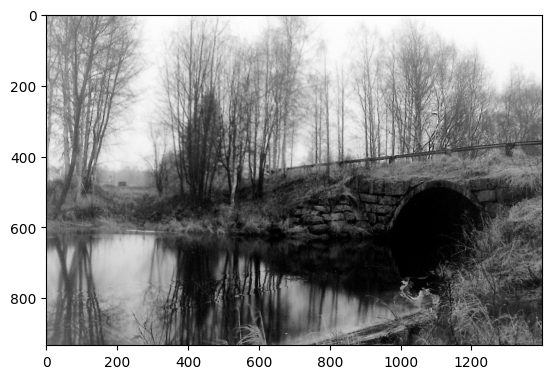

In [ ]:
plt.imshow(output_img)
plt.show()

In [ ]:
output_pixel_freq_df = pd.DataFrame(get_pixel_frequency(output_img))
output_pixel_freq_df.rename(columns={0: 'frequency'}, inplace=True)

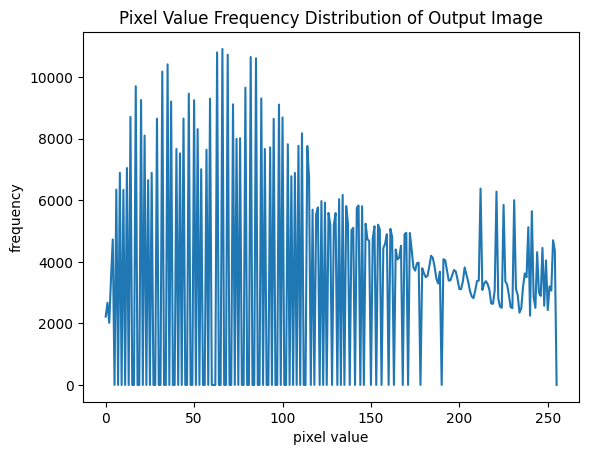

In [ ]:
sns.lineplot(data=output_pixel_freq_df, x=output_pixel_freq_df.index, y='frequency').set(xlabel='pixel value', title='Pixel Value Frequency Distribution of Output Image')
plt.show()

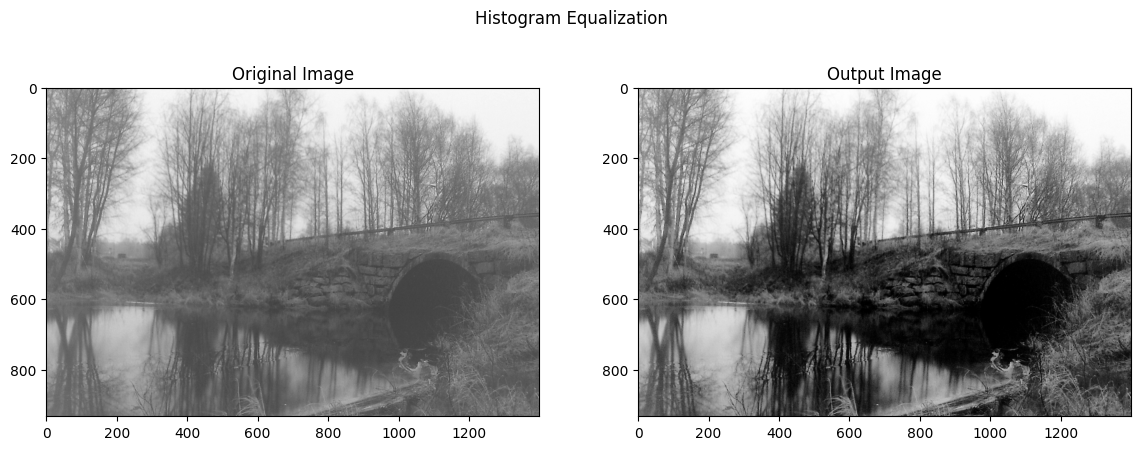

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('Output Image')

plt.suptitle('Histogram Equalization')
plt.show()

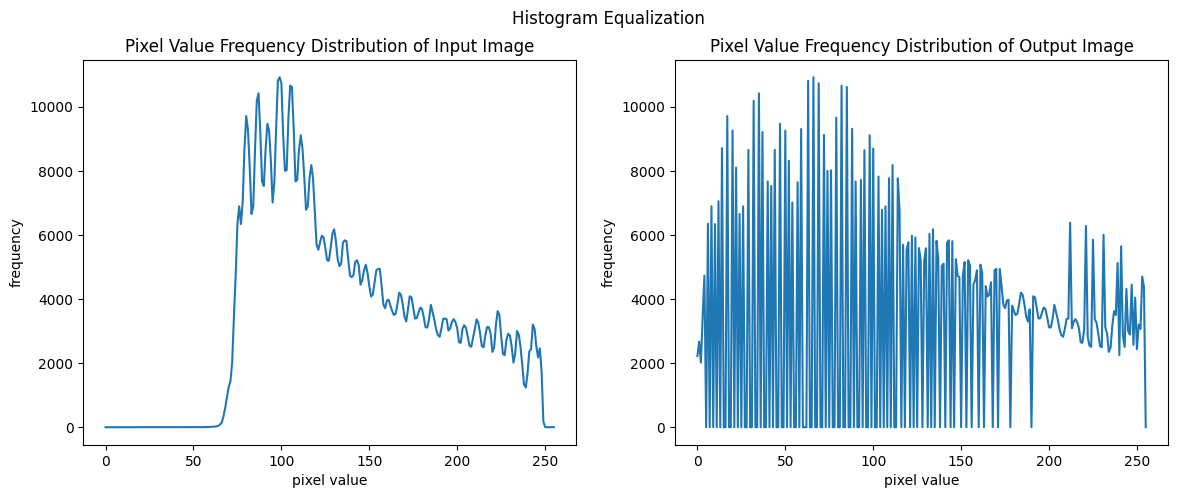

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=pixel_freq_df, x=pixel_freq_df.index, y='frequency').set(xlabel='pixel value', title='Pixel Value Frequency Distribution of Input Image')

plt.subplot(1, 2, 2)
sns.lineplot(data=output_pixel_freq_df, x=output_pixel_freq_df.index, y='frequency').set(xlabel='pixel value', title='Pixel Value Frequency Distribution of Output Image')

plt.suptitle('Histogram Equalization')
plt.show()

**Applications of Histogram Equalization:**

* ***Medical Imaging:*** Enhancing the contrast of X-rays, CT scans, or MRI images to make certain features (e.g., tumors, bones) more visible, which aids in diagnosis.

* ***Remote Sensing:*** Improving the visibility of features in satellite images, especially when the images are taken under varying lighting conditions or have poor contrast due to atmospheric effects.

* ***Document Scanning and OCR:*** Improving the readability of scanned documents by enhancing text contrast, making it easier for Optical Character Recognition (OCR) systems to detect and recognize characters.

* ***Astronomy:*** Enhancing astronomical images to reveal faint objects like stars or galaxies, which may be obscured by the bright background or noise.

**Conclusion:** We have successfully performed histogram equalization on the low-contrast image, increasing its constrast and making it easier to see. As shown in the plot above, the pixel values are much more uniformly distributed in the output image than in the input image.
